##### Import the Necessary Libraries and Dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

Image Label:  5


(-0.5, 27.5, 27.5, -0.5)

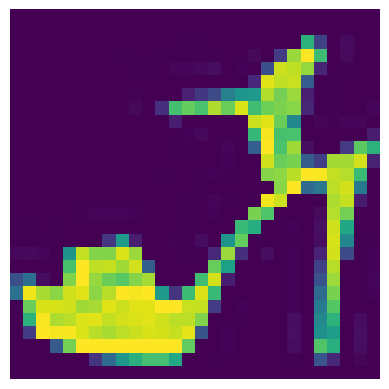

In [4]:
# Let's check the samples of the dataset
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label: ", ytrain[imgIndex])
plt.imshow(image)
plt.axis("off")

In [5]:
# Lets' have a look at the shape of training and test sets
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# Let's build a neural network architecture with two hidden layer's
from keras.layers import Input

model = keras.models.Sequential([
    Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
xvalid, xtrain = xtrain[:5000] / 250.0, xtrain[5000:] / 250.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [20]:
#Training a classification model using Netural Network for the task of image classification
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
               metrics=["accuracy"]
               )
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data = (xvalid, yvalid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6805 - loss: 0.9860 - val_accuracy: 0.8300 - val_loss: 0.5021
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8264 - loss: 0.5010 - val_accuracy: 0.8446 - val_loss: 0.4639
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8444 - loss: 0.4487 - val_accuracy: 0.8542 - val_loss: 0.4227
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8534 - loss: 0.4236 - val_accuracy: 0.8540 - val_loss: 0.4127
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8612 - loss: 0.3947 - val_accuracy: 0.8720 - val_loss: 0.3768
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8667 - loss: 0.3786 - val_accuracy: 0.8446 - val_loss: 0.4190
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8683 - loss: 0.3687 - val_accuracy: 0.8668 - val_loss: 0.3829
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8745 - loss: 0

In [21]:
# Now let's make a predictions
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [22]:
predictions.shape

(5, 10)

In [23]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


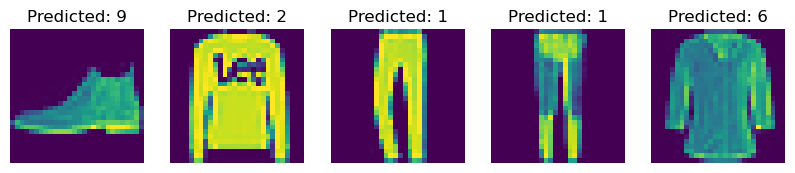

In [28]:
num_images = len(new)

plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(new[i])
    plt.title(f"Predicted: {classes[i]}")
    plt.axis("off")
    
plt.show()
